<center>
    <h1> INF477 - Redes Neuronales Artificiales  </h1>
    <h2> Tarea #3 - Parte II: Análisis de sentimientos usando RNN </h2> 
</center>

Tarea realizada por:
* Alvaro Salinas - `alvaro.salinase@gmail.com` - **rol:** 201073001-8
* Martín Villanueva - `martin.villanueva@alumnos.usm.cl` - **rol:** 201104012-0

_DI UTFSM. Noviembre 2016._

## Tabla de Contenidos
* [Parte (a)](#a)
* [Parte (b)](#b)
* [Parte (c)](#c)
* [Parte (d)](#d)
* [Parte (e)](#e)
* [Parte (f)](#f)
* [Parte (g)](#g)
* [Parte (h)](#h)

In [76]:
import numpy as np
# fixing the seed
np.random.seed(3)

from theano.tensor.shared_randomstreams import RandomStreams
srng = RandomStreams(8)

import matplotlib.pyplot as plt
%matplotlib inline

from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.layers.embeddings import Embedding

import sys
sys.path.append('../')
from keras_helper import load_keras_model as load
from keras_helper import save_keras_model as save

# Directory where models will be saved
base_dir = 'models/'

<div id='a'/>
## Parte (a)

In [6]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(seed=15)

65503232/65552540 [============================>.] - ETA: 0s

<div id='b'/>
## Parte (b)

In [16]:
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

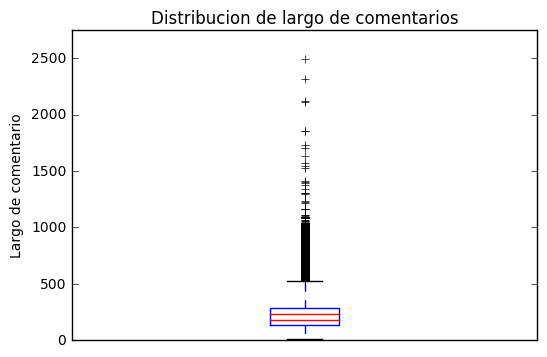

In [46]:
lengths = map(len, X)
plt.boxplot(lengths, showmeans=True, meanline=True)
plt.title("Distribucion de largo de comentarios")
plt.ylabel("Largo de comentario")
plt.ylim([0,2750])
plt.xticks([])
plt.show()

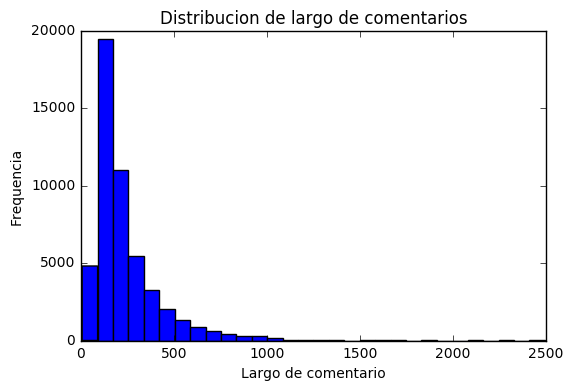

In [42]:
plt.hist(lengths, bins=30)
plt.title("Distribucion de largo de comentarios")
plt.xlabel("Largo de comentario")
plt.ylabel("Frequencia")
plt.show()

<div id='c'/>
## Parte (c)

In [48]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=3000, seed=15)
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

<div id='d'/>
## Parte (d)

In [61]:
def generate_model(embedding_vector_length, top_words, n_lstm_units=100):
    model = Sequential()
    model.add(Embedding(top_words, embedding_vector_length, input_length=500))
    model.add(LSTM(n_lstm_units))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [64]:
model = generate_model(embedding_vector_length=32, top_words=3000, n_lstm_units=100)
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
embedding_3 (Embedding)          (None, 500, 32)       96000       embedding_input_3[0][0]          
____________________________________________________________________________________________________
lstm_3 (LSTM)                    (None, 100)           53200       embedding_3[0][0]                
____________________________________________________________________________________________________
dense_3 (Dense)                  (None, 1)             101         lstm_3[0][0]                     
Total params: 149301
____________________________________________________________________________________________________


In [65]:
# fitting the model
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=1, batch_size=64)

Train on 25000 samples, validate on 25000 samples
Epoch 1/1
25000/25000 [==============================] - 594s - loss: 0.4720 - acc: 0.7666 - val_loss: 0.3273 - val_acc: 0.8611


In [70]:
hist.history

{'acc': [0.76664000001907351],
 'loss': [0.47197909021377565],
 'val_acc': [0.86108000001907348],
 'val_loss': [0.32728935646057128]}

In [66]:
# evaluating the model
scores = model.evaluate(X_test, y_test, verbose=0)

In [71]:
scores

[0.32728935683250426, 0.86107999999999996]

<div id='e'/>
## Parte (e)

In [ ]:
###########################################################
## The execution of this cell is computationally expensive
###########################################################

embedding_lengths = [8,16,32,64,128,256,512,1024]
acc_tr = []
acc_ts = []

for length in embedding_lengths:
    model = generate_model(embedding_vector_length=32, top_words=3000, n_lstm_units=100)
    # fitting the model
    hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=3, batch_size=64)
    # evaluating the model
    acc_tr.append(model.evaluate(X_train, y_train)[1])
    acc_ts.append(model.evaluate(X_test, y_test)[1])
    # saving the model
    save(model, 'lstm100_embbeding{0}'.format(length), base_dir=base_dir)

<div id='f'/>
## Parte (f)

<div id='g'/>
## Parte (g)

<div id='h'/>
## Parte (h)